In [232]:
#--- load required packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # Import the PCA module
from sklearn.metrics import explained_variance_score
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances
#--- load data
ing_mat = loadmat('MATLAB/ingredients.mat')['ingredients']
cityDist_mat = loadmat('MATLAB/citiesDistMat.mat')['citiesDistMat']
labelName_mat = loadmat('MATLAB/labelNames.mat')['labelNames']
labels_mat = loadmat('MATLAB/labels.mat')['labels']
recipe_mat = loadmat('MATLAB/recipes.mat')['recipes']
labelsName = [l[0][0] for l in labelName_mat]
#--- for colnames
ing_headline = []
for i in ing_mat[0]:
    ing_headline.append(i[0])
#--- create data matrices
dataset_X = pd.DataFrame(recipe_mat,columns=ing_headline) #predictors
dataset_y = pd.DataFrame(labelsName,columns=['label']) #labels
X_train_full,X_test,y_train_full,y_test = train_test_split(dataset_X,dataset_y,test_size=0.2) #train test split
X_train,X_val,y_train,y_val = train_test_split(X_train_full,y_train_full,test_size=0.25) #train val split
X_train_len = len(X_train)
dataset_y = dataset_y.squeeze()
y_train = y_train.squeeze()
#--- additionally have cuisines as list
cuisines = []
# for n in range(0, 12, 1):
#     idx = dataset_y.index[dataset_y.label == n+1]
#     print (idx)
#     cuisines.append(labelName_mat[idx[0]][0].item())

In [233]:
def scatter_2d_label(X_2d, y, ax=None, s=2, alpha=0.5, lw=2):
    """Visualise a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Low-dimensional feature representation.
    
    y : ndarray, shape (n_samples,)
        Labels corresponding to the entries in X_2d.
        
    ax : matplotlib axes.Axes 
         axes to plot on
         
    s : float
        Marker size for scatter plot.
    
    alpha : float
        Transparency for scatter plot.
        
    lw : float
        Linewidth for scatter plot.
    """
    
    targets = np.unique(y)  # extract unique labels
    colors = sns.color_palette(palette='hsv_r',n_colors=targets.size)
    
    if ax is None:
        fig, ax = plt.subplots()
        
    # scatter plot    
    for color, target in zip(colors, targets):
        ax.scatter(X_2d[y == target, 0], X_2d[y == target, 1], color=color, label=target, s=s, alpha=alpha, lw=lw)
    
    # add legend
    ax.legend(loc='center left', bbox_to_anchor=[1.01, 0.5], scatterpoints=3, frameon=False); # Add a legend outside the plot at specified point
    
    return ax
def kde_2d_label(X_2d, y, ax=None):
    """Kernel density estimate in a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Data to plot
    
    y : ndarray, shape (n_samples,)
        Labels corresponding to the entries in X_2d.
        
    ax : matplotlib axes.Axes 
         axes to plot on    
    """
    
    if ax is None:
        fig, ax = plt.subplots()
        
    targets = np.unique(y)
    palette_name = 'hsv_r'
    colors = sns.color_palette(palette_name, n_colors=targets.size)
    lines = []
    for color, target in zip(colors, targets):
        sns.kdeplot(X_2d[y==target, 0], X_2d[y==target, 1], ax=ax, cmap=sns.dark_palette(color, as_cmap=True))
        lines.append(mlines.Line2D([], [], color=color, label=target))  # dummy line for the legend
    
    # add legend
    ax.legend(lines, targets, loc='center left', bbox_to_anchor=[1.01, 0.5], frameon=False) 
    

# Kernel PCA

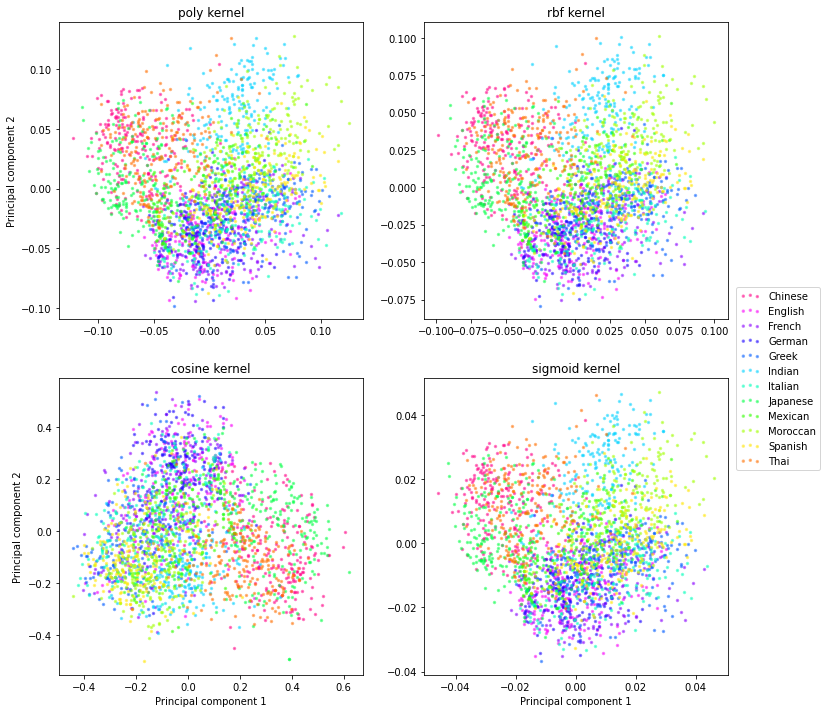

In [234]:
# Your code goes here

kernels = ['poly', 'rbf', 'cosine', 'sigmoid']
fig, ax = plt.subplots(2,2,figsize=(12,12));

for ii, kernel in enumerate(kernels):
    X_kpca_2d = KernelPCA(n_components=2, kernel=kernel).fit_transform(X_train)
    cur_ax = ax[ii//2, ii%2]
    scatter_2d_label(X_kpca_2d, y_train, ax=cur_ax)
    cur_ax.set(title='{} kernel'.format(kernel))
    cur_ax.legend().set_visible(False)

ax[0, 0].set_ylabel('Principal component 2')
ax[1, 0].set_ylabel('Principal component 2')

ax[1, 0].set_xlabel('Principal component 1')
ax[1, 1].set_xlabel('Principal component 1')

plt.legend(loc='center left', bbox_to_anchor=[1.01, 1.], scatterpoints=3);

# TSNE

In [235]:
X_embedded = TSNE(n_components=2,n_iter=2000).fit_transform(X_train)

[Text(0.5, 1.0, 'Recipes by origin (t-SNE)')]

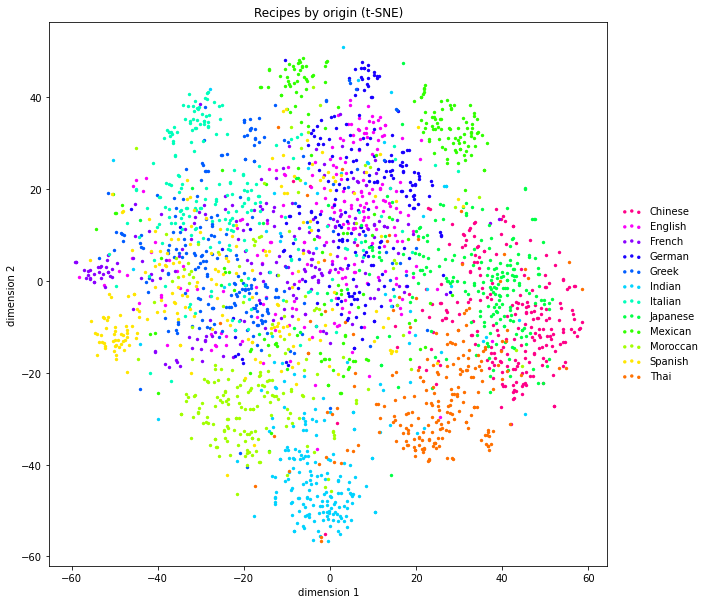

In [236]:

fig, ax = plt.subplots(figsize=(10,10))
scatter_2d_label(X_embedded,y_train,alpha=1,ax=ax)
ax.set_xlabel('dimension 1')
ax.set_ylabel('dimension 2')
ax.set(title='Recipes by origin (t-SNE)')

# Isomap

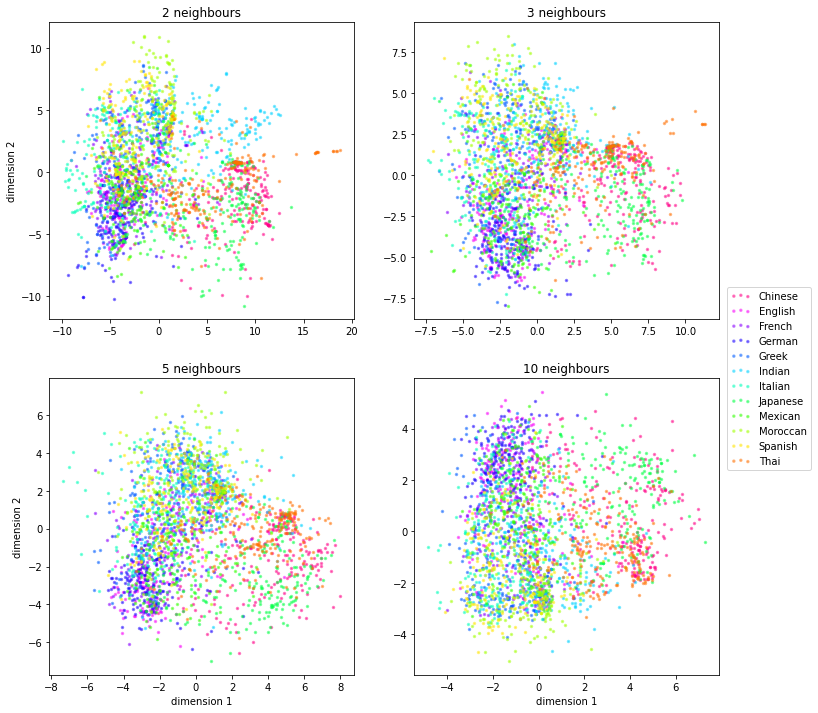

In [237]:
from sklearn.manifold import Isomap

# Your code goes here

n_neighbours_arr = [2, 3, 5, 10]
fig, ax = plt.subplots(2,2,figsize=(12,12))

for ii, n_neighbours in enumerate(n_neighbours_arr):
    ismp = Isomap(n_components=2, n_neighbors=n_neighbours)
    X_ismp_2d = ismp.fit_transform(X_train)
    
    cur_ax = ax[ii//2, ii%2]
    scatter_2d_label(X_ismp_2d, y_train, ax=cur_ax)
    cur_ax.set(title='{} neighbours'.format(n_neighbours))
    cur_ax.legend().set_visible(False)
 
ax[0, 0].set_ylabel('dimension 2')
ax[1, 0].set_ylabel('dimension 2')

ax[1, 0].set_xlabel('dimension 1')
ax[1, 1].set_xlabel('dimension 1')

plt.legend(loc='center left', bbox_to_anchor=[1.01, 1.], scatterpoints=3);

# Metric MDS

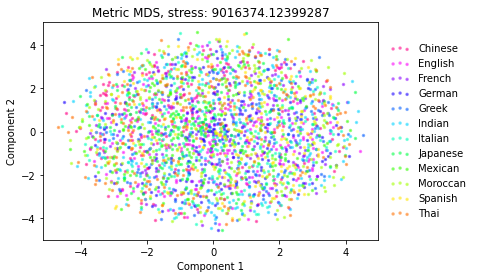

In [238]:
# Your code goes here

mds = MDS(n_components=2, n_jobs=-1, random_state=10, max_iter=100)
X_mds_2d = mds.fit_transform(X_train)

scatter_2d_label(X_mds_2d, y_train)
plt.title('Metric MDS, stress: {}'.format(mds.stress_))
plt.xlabel('Component 1')
plt.ylabel('Component 2');

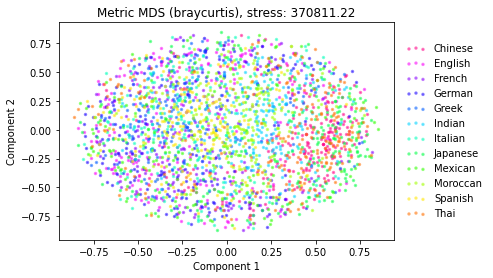

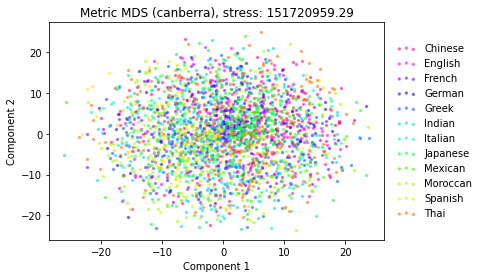

In [239]:
# Your code goes here

my_metrics = ['braycurtis', 'canberra']
for metric in my_metrics:
    delta = pairwise_distances(X=X_train, metric=metric)
    mds = MDS(n_components=2, dissimilarity='precomputed', n_jobs=-1, max_iter=100)
    X_mds_2d = mds.fit_transform(delta)
    scatter_2d_label(X_mds_2d, y_train)
    plt.title('Metric MDS ({0}), stress: {1:.2f}'.format(metric, mds.stress_))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2');